# Continuous Control

---


### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
#Run the following commented code if you have not installed UnityEnvironment yet
#!pip -q install ./python


In [2]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from collections import deque
import torch

 <span style="color:red">First, you must download the environment relevant to your machine (links are given inside readme), then unzip the file.</span>

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [3]:
env = UnityEnvironment(file_name="Reacher_1_Windows_x86_64/Reacher.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# for i in range(100):
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

### 4. Training the agent:

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
from ddpg_agent import Agent  
random_seed = 0

agent = Agent(state_size, action_size,  random_seed)


In [8]:
def ddpg_run(n_episodes=2000, max_t=500, learn_every=5, num_learn = 10, save_weights_every=100):
    total_scores_deque = deque(maxlen=100)
    total_scores = [] 
    
    for i_episode in range(n_episodes):
        env_info = env.reset(train_mode=True)[brain_name]     
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        agent.reset()
        for t_step in range(max_t):
            actions = agent.act(states) 
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.save(state, action, reward, next_state, done)
           
            
            if (t_step % learn_every == 0 and t_step!=0):
                for i in range(num_learn):
                    agent.start_learn()
                
            scores += env_info.rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
        
        mean_score = np.mean(scores)
        total_scores_deque.append(mean_score)
        total_scores.append(mean_score)
        total_average_score = np.mean(total_scores_deque)
        
        print('\rEpisode {}\tTotal Average Score: {:.2f}\tCurrent Average Score: {:.2f}'
              .format(i_episode, total_average_score, mean_score))

        if (i_episode % save_weights_every == 0 and i_episode!=0):
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor'+str(i_episode)+'.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic'+str(i_episode)+'.pth')
#             print('\rEpisode {}\tTotal Average Score: {:.2f}'.format(i_episode, total_average_score))  
            
        if total_average_score >= 30:
            print('Problem Solved after {} epsisodes!! Total Average score: {:.2f}'.format(i_episode, total_average_score))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_final.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_final.pth')
            break
            
            
    return total_scores

scores = ddpg_run(n_episodes = 500, max_t = 1000)

Episode 0	Total Average Score: 0.98	Current Average Score: 0.98
Episode 1	Total Average Score: 1.14	Current Average Score: 1.31
Episode 2	Total Average Score: 0.83	Current Average Score: 0.20
Episode 3	Total Average Score: 0.95	Current Average Score: 1.32
Episode 4	Total Average Score: 0.96	Current Average Score: 0.98
Episode 5	Total Average Score: 0.85	Current Average Score: 0.33
Episode 6	Total Average Score: 0.87	Current Average Score: 0.97
Episode 7	Total Average Score: 0.99	Current Average Score: 1.81
Episode 8	Total Average Score: 1.11	Current Average Score: 2.06
Episode 9	Total Average Score: 1.08	Current Average Score: 0.86
Episode 10	Total Average Score: 1.18	Current Average Score: 2.12
Episode 11	Total Average Score: 1.33	Current Average Score: 2.98
Episode 12	Total Average Score: 1.43	Current Average Score: 2.73
Episode 13	Total Average Score: 1.39	Current Average Score: 0.82
Episode 14	Total Average Score: 1.49	Current Average Score: 2.94
Episode 15	Total Average Score: 1.6

Episode 125	Total Average Score: 16.77	Current Average Score: 33.31
Episode 126	Total Average Score: 17.01	Current Average Score: 27.52
Episode 127	Total Average Score: 17.32	Current Average Score: 33.24
Episode 128	Total Average Score: 17.58	Current Average Score: 32.51
Episode 129	Total Average Score: 17.81	Current Average Score: 27.48
Episode 130	Total Average Score: 18.10	Current Average Score: 32.10
Episode 131	Total Average Score: 18.37	Current Average Score: 31.44
Episode 132	Total Average Score: 18.67	Current Average Score: 33.58
Episode 133	Total Average Score: 18.91	Current Average Score: 29.13
Episode 134	Total Average Score: 19.18	Current Average Score: 31.20
Episode 135	Total Average Score: 19.44	Current Average Score: 31.09
Episode 136	Total Average Score: 19.73	Current Average Score: 32.85
Episode 137	Total Average Score: 19.98	Current Average Score: 31.83
Episode 138	Total Average Score: 20.27	Current Average Score: 33.88
Episode 139	Total Average Score: 20.50	Current A

Average Score - episode diagram:

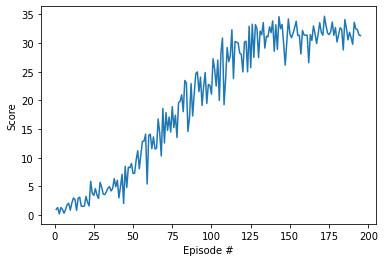

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


checking performance of the trained agent:

In [12]:
agent2 = Agent(state_size, action_size,  random_seed)

agent2.actor_local.load_state_dict(torch.load('checkpoint_actor_final.pth', map_location='cpu'))
agent2.critic_local.load_state_dict(torch.load('checkpoint_critic_final.pth', map_location='cpu'))

env_info = env.reset(train_mode=False)[brain_name]     
states = env_info.vector_observations                  
scores = np.zeros(num_agents)                          

for t_step in range(300):
    actions = agent2.act(states)                        
    env_info = env.step(actions)[brain_name]          
    next_states = env_info.vector_observations         
    rewards = env_info.rewards                         
    dones = env_info.local_done                        
    scores += env_info.rewards                         
    states = next_states                               
    if np.any(dones):                                  
        break

In [9]:
# env.close()